# Credit Risk Ensemble Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)

df.head()

loan_size  interest_rate homeowner  borrower_income  debt_to_income  \
0    10700.0          7.672       own            52800        0.431818   
1     8400.0          6.692       own            43600        0.311927   
2     9000.0          6.963      rent            46100        0.349241   
3    10700.0          7.664       own            52700        0.430740   
4    10800.0          7.698  mortgage            53000        0.433962   

   num_of_accounts  derogatory_marks  total_debt loan_status  
0                5                 1       22800    low_risk  
1                3                 0       13600    low_risk  
2                3                 0       16100    low_risk  
3                5                 1       22700    low_risk  
4                5                 1       23000    low_risk

# Split the Data into Training and Testing

In [5]:
# Binary encoding using Pandas (multiple columns)
df_binary_encoded=pd.get_dummies(df,columns=["homeowner"])
df_binary_encoded.head()


loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt loan_status  homeowner_mortgage  \
0                 1       22800    low_risk                   0   
1                 0       13600    low_risk                   0   
2                 0       16100    low_risk                   0   
3                 1       22700    low_risk                   0   
4                 1       23000    low_risk                   1   

   homeowner_own  homeowner_rent  
0              1               0  
1              1               0  
2              0               1  
3              1               0  
4              0               0

In [6]:
# Create our features
X =  df_binary_encoded.drop(columns="loan_status")

# Create defined target vector
y =df_binary_encoded["loan_status"]
#y =df_binary_encoded["loan_status"].values.reshape(-1, 1)

In [7]:
X.describe()

loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700.000000       6.825000     44800.000000        0.330357   
50%     9500.000000       7.172000     48100.000000        0.376299   
75%    10400.000000       7.528000     51400.000000        0.416342   
max    23800.000000      13.235000    105200.000000        0.714829   

       num_of_accounts  derogatory_marks    total_debt  homeowner_mortgage  \
count     77536.000000      77536.000000  77536.000000        77536.000000   
mean          3.826610          0.392308  19221.949804            0.497472   
std           1.904426          0.582086   8371.635077            0.499997   
min           0.000000          0.000000      0.000000            0.000000   
25%           3.000000          0.000000  14800.000000            0.000000   
50%           4.000000          0.000000  18100.000000            0.000000   
75%           4.000000          1.000000  21400.000000            1.000000   
max          16.000000          3.000000  75200.000000            1.000000   

       homeowner_own  homeowner_rent  
count   77536.000000    77536.000000  
mean        0.398911        0.103616  
std         0.489678        0.304764  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000000        0.000000  
75%         1.000000        0.000000  
max         1.000000        1.000000

In [8]:
# Check the balance of our target values - loan status
Counter(y)


Counter({'low_risk': 75036, 'high_risk': 2500})

In [9]:
y[:5]

0    low_risk
1    low_risk
2    low_risk
3    low_risk
4    low_risk
Name: loan_status, dtype: object

In [10]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   random_state=1,
                                                   stratify=y)


## Scaling Data

In [11]:
# Creating the scaler instance
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()

In [12]:
# Fitting Standard Scaller
X_scaler = data_scaler.fit(X_train)

In [13]:
# Transforming the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Decision Tree - Optional

In [30]:
# Scaling data for decision tree
X_train_scaled_decision = X_scaler.transform(X_train)
X_test_scaled_decision = X_scaler.transform(X_test)

In [32]:
# Creating the decision tree classifier instance
from sklearn import tree
decision_model = tree.DecisionTreeClassifier()
# Fitting the model
decision_model = decision_model.fit(X_train_scaled_decision, y_train)
# Making predictions using the testing data
decision_model_predictions = decision_model.predict(X_test_scaled_decision)

In [34]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
decision_model_cm = confusion_matrix(y_test, decision_model_predictions)
decision_model_cm_df = pd.DataFrame(
    decision_model_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
decision_model_acc_score = accuracy_score(y_test, decision_model_predictions)


In [35]:
# Displaying results
print("Confusion Matrix")
display(decision_model_cm_df)
print(f"Accuracy Score : {decision_model_acc_score}")
print("Classification Report")
print(classification_report(y_test, decision_model_predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0          552           73
Actual 1           86        18673

Accuracy Score : 0.9917973586463062
Classification Report
              precision    recall  f1-score   support

   high_risk       0.87      0.88      0.87       625
    low_risk       1.00      1.00      1.00     18759

    accuracy                           0.99     19384
   macro avg       0.93      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384



In [36]:
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(
    decision_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [14]:
# Resample the training data with the BalancedRandomForestClassifier
# Create a random forest classifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf_model=BalancedRandomForestClassifier(n_estimators=100, random_state=1)

In [15]:
# Fit model
brf_model.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=1)

In [16]:
# Making Predictions Using the Random Forest Model
predictions = brf_model.predict(X_test_scaled)

### Model Evaluation - Balanced Random Forest

In [17]:
# Calculated the balanced accuracy score
brf_model_accuracy_score = balanced_accuracy_score(y_test, predictions)
print(f"Balanced Random Forest Accuracy Score :{brf_model_accuracy_score}")

Balanced Random Forest Accuracy Score :0.9936818806972654


In [18]:

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Display the confusion matrix
print("Confusion Matrix: ")
cm_df

Confusion Matrix: 


Predicted 0  Predicted 1
Actual 0          622            3
Actual 1          147        18612

In [19]:
# Print the imbalanced classification report
print("Classfication Report: ")
print(classification_report_imbalanced(y_test, predictions))

Classfication Report: 
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.81      1.00      0.99      0.89      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



## Feature Importance

In [20]:
# List the features sorted in descending order by feature importance
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.22759633831687995, 'borrower_income'),
 (0.1965574723230606, 'interest_rate'),
 (0.17417807060091195, 'debt_to_income'),
 (0.14944360428565667, 'total_debt'),
 (0.14229163194622926, 'loan_size'),
 (0.07859627283289125, 'num_of_accounts'),
 (0.02885770833789564, 'derogatory_marks'),
 (0.001219411955649641, 'homeowner_own'),
 (0.0008974701883394341, 'homeowner_mortgage'),
 (0.0003620192124855904, 'homeowner_rent')]

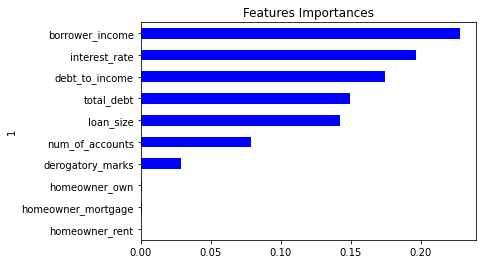

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(brf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False)


### Easy Ensemble Classifier

In [22]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
easy_model=EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [23]:
# Fit model
easy_model.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [24]:
# Making Predictions Using the Easy Ensemble Model
easy_model_predictions =easy_model.predict(X_test)


###  Model Evaluation - Easy Ensemble Model

In [25]:
# Calculated the balanced accuracy score
easy_model_accuracy_score = balanced_accuracy_score(y_test, easy_model_predictions)
print(f"Easy Ensemble Model Accuracy Score :{easy_model_accuracy_score}")

Easy Ensemble Model Accuracy Score :0.9944548430086891


In [26]:
# Calculating the confusion matrix
easy_cm = confusion_matrix(y_test, easy_model_predictions)
easy_cm_df = pd.DataFrame(
    easy_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Display the confusion matrix
print("Confusion Matrix: ")
easy_cm_df

Confusion Matrix: 


Predicted 0  Predicted 1
Actual 0          622            3
Actual 1          118        18641

In [27]:
# Print the imbalanced classification report
print("Classfication Report: ")
print(classification_report_imbalanced(y_test, easy_model_predictions))

Classfication Report: 
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.84      1.00      0.99      0.91      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



### Questions

1. Which model had the best balanced accuracy score?
* Easy ensemble classifier 0.9944548430086891.
* Balanced Random Forest Accuracy Score 0.9936818806972654.
* The easy ensemble classifier has the best balanced accuracy score.


2. Which model had the best recall score?
* Both models appear to have the same recall score


3. Which model had the best geometric mean score?
* Both models appear to have the same geo mean score at 0.99



4. What are the top three features?
* Borrower Income, Interest Rate, Debt to Income